<a href="https://colab.research.google.com/github/Shyamkumarnagilla/Lung-Cancer-Prediction/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lung Cancer Prediction**

# Problem Statement
Lung cancer's high mortality rate is partly due to late-stage diagnosis. Traditional diagnostic methods can be expensive and time-consuming. This project aims to develop a machine learning model that predicts the likelihood of lung cancer using patient data. The goal is to enable early detection and improve patient outcomes by providing a reliable and efficient predictive tool.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, mean_absolute_error , mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

import warnings
warnings.filterwarnings("ignore")

Importing dataset

In [ ]:
lung_cancer = pd.read_csv("/content/survey lung cancer.csv")

Reading dataset

In [ ]:
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Exploratary Data Analysis(EDA)

In [ ]:
lung_cancer.shape

(309, 16)

In [ ]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
lung_cancer.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
lung_cancer.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


# Data Preprocessing

In [ ]:
lung_cancer.duplicated().sum()

33

In [ ]:
#Remove duplicates
lung_cancer.drop_duplicates(inplace=True)
lung_cancer.duplicated().sum()

0

In [ ]:
print(lung_cancer.GENDER.value_counts())

GENDER
M    142
F    134
Name: count, dtype: int64


In [ ]:
lung_cancer.replace({"GENDER": {"M": 0, "F": 1}}, inplace = True)

In [ ]:
print(lung_cancer.LUNG_CANCER.value_counts())

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64


In [ ]:
lung_cancer.replace({"LUNG_CANCER": {"NO": 0, "YES": 1}}, inplace = True)

In [ ]:
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
lung_cancer.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

# Data Visualization

In [ ]:

lung_cancer = lung_cancer[["GENDER", "SMOKING", "YELLOW_FINGERS", "ANXIETY",
       "PEER_PRESSURE", "CHRONIC DISEASE", "FATIGUE ", "ALLERGY ", "WHEEZING",
       "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH",
       "SWALLOWING DIFFICULTY", "CHEST PAIN", "LUNG_CANCER"]]

In [ ]:
list(enumerate(lung_cancer))

[(0, 'GENDER'),
 (1, 'SMOKING'),
 (2, 'YELLOW_FINGERS'),
 (3, 'ANXIETY'),
 (4, 'PEER_PRESSURE'),
 (5, 'CHRONIC DISEASE'),
 (6, 'FATIGUE '),
 (7, 'ALLERGY '),
 (8, 'WHEEZING'),
 (9, 'ALCOHOL CONSUMING'),
 (10, 'COUGHING'),
 (11, 'SHORTNESS OF BREATH'),
 (12, 'SWALLOWING DIFFICULTY'),
 (13, 'CHEST PAIN'),
 (14, 'LUNG_CANCER')]

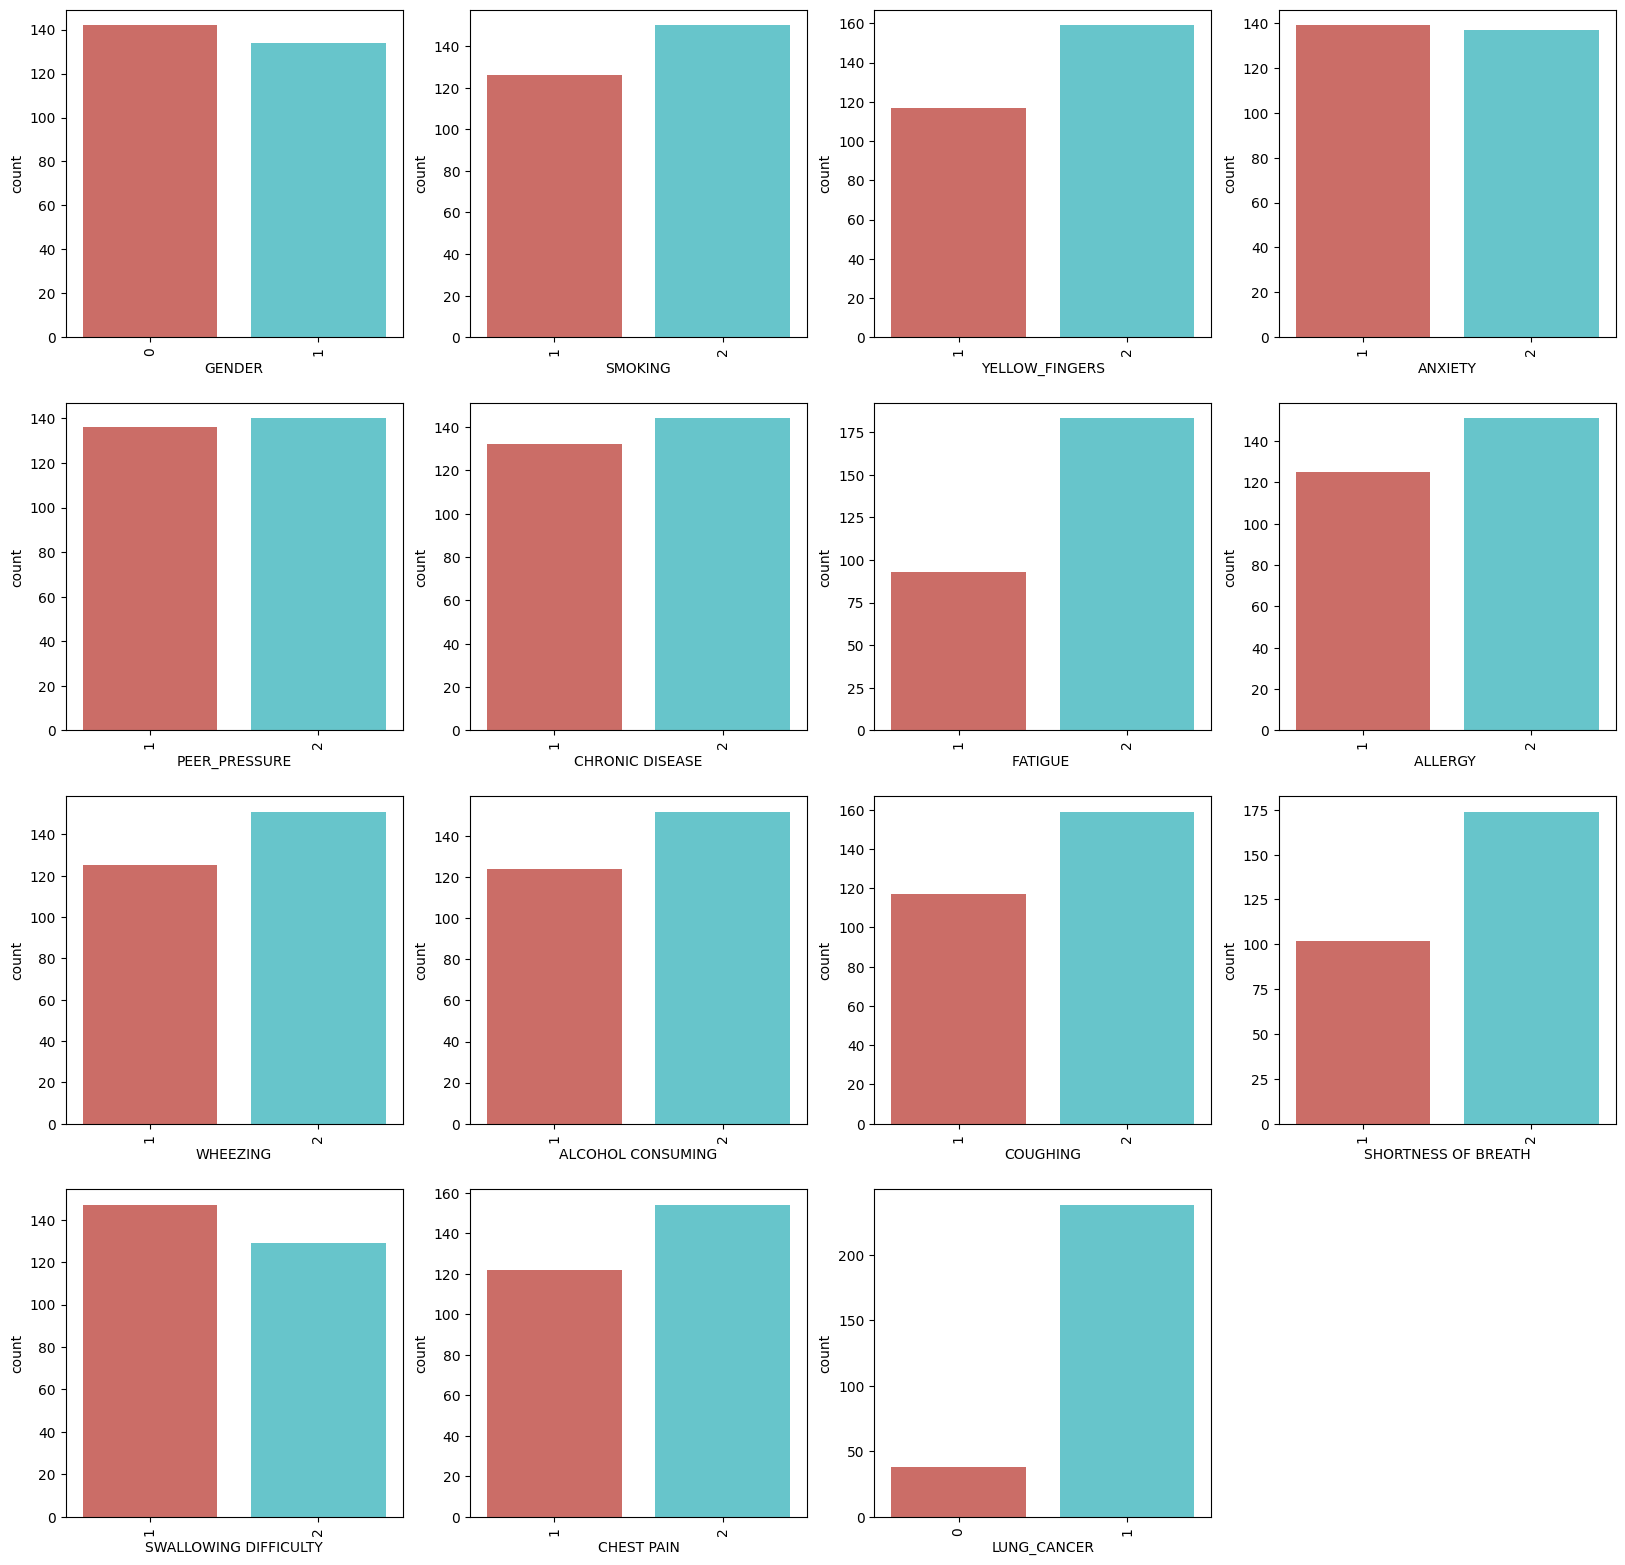

In [ ]:
plt.figure(figsize=(20,40))
for i in enumerate(lung_cancer):
    plt.subplot(8, 4, i[0]+1)


    sns.countplot(x = i[1], data = lung_cancer, palette = "hls")

    plt.xticks(rotation = 90)

plt.show()

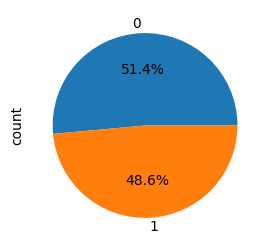

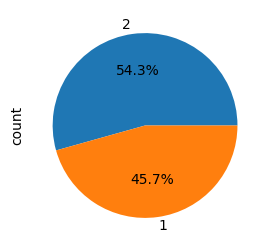

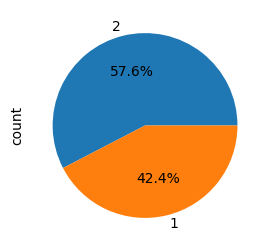

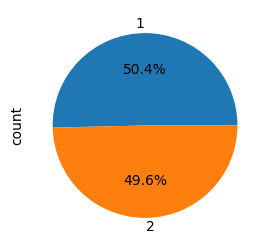

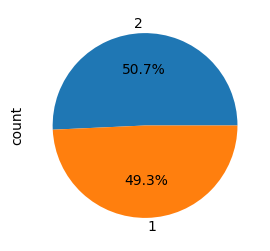

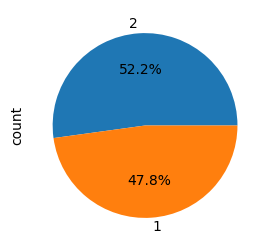

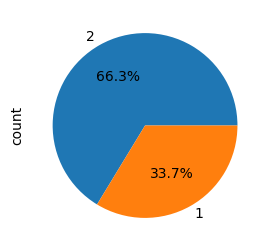

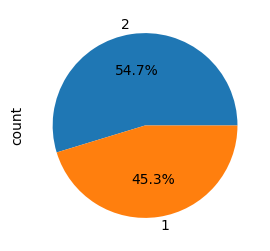

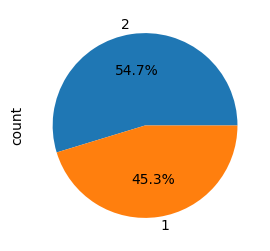

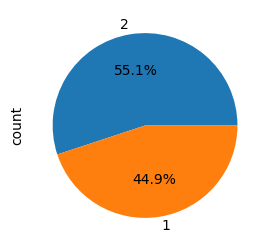

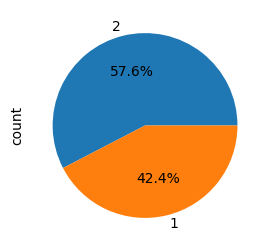

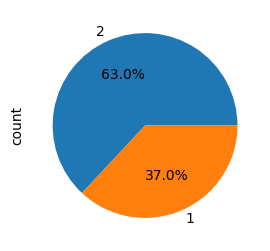

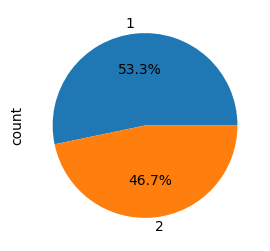

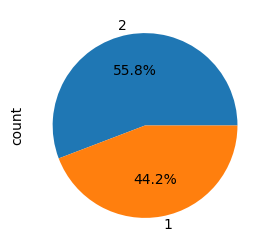

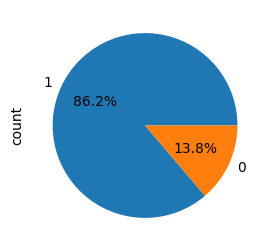

In [ ]:
for i in lung_cancer.columns:

    lung_cancer[i].value_counts().plot(kind = "pie", figsize = (3,3), autopct = "%1.1f%%")
    plt.xticks(rotation = 45)
    plt.show()

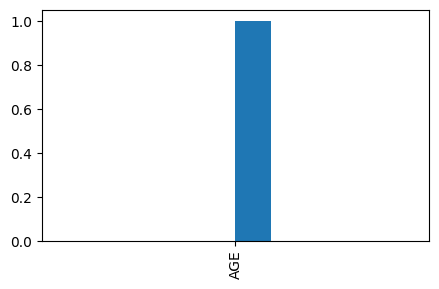

In [ ]:
plt.figure(figsize=(5,3))
plt.hist(x = "AGE", data = lung_cancer)
plt.xticks(rotation = 90)
plt.show()

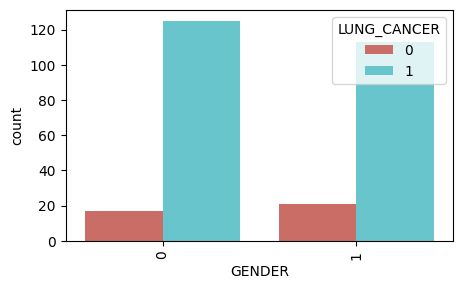

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x = "GENDER", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.xticks(rotation = 90)
plt.show()

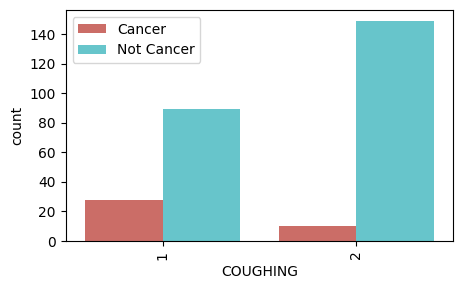

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x = "COUGHING", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

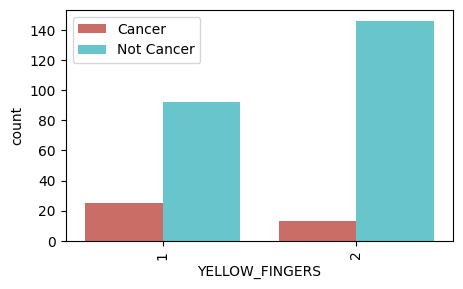

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x = "YELLOW_FINGERS", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

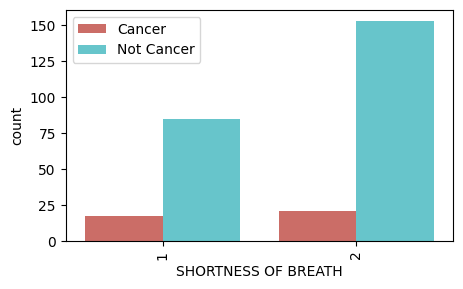

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x = "SHORTNESS OF BREATH", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

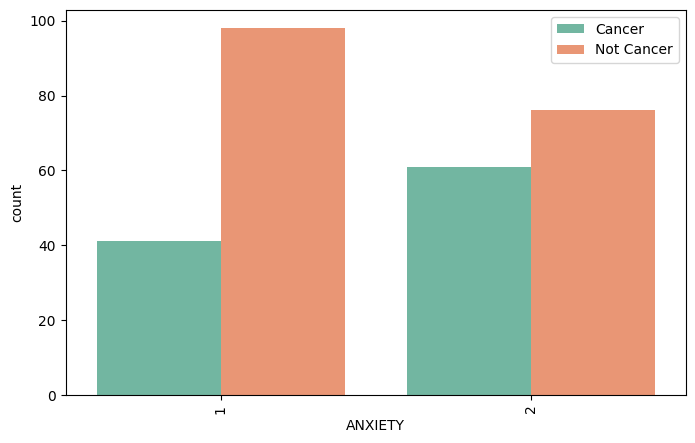

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = "ANXIETY", data = lung_cancer, hue = "SHORTNESS OF BREATH", palette = "Set2")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

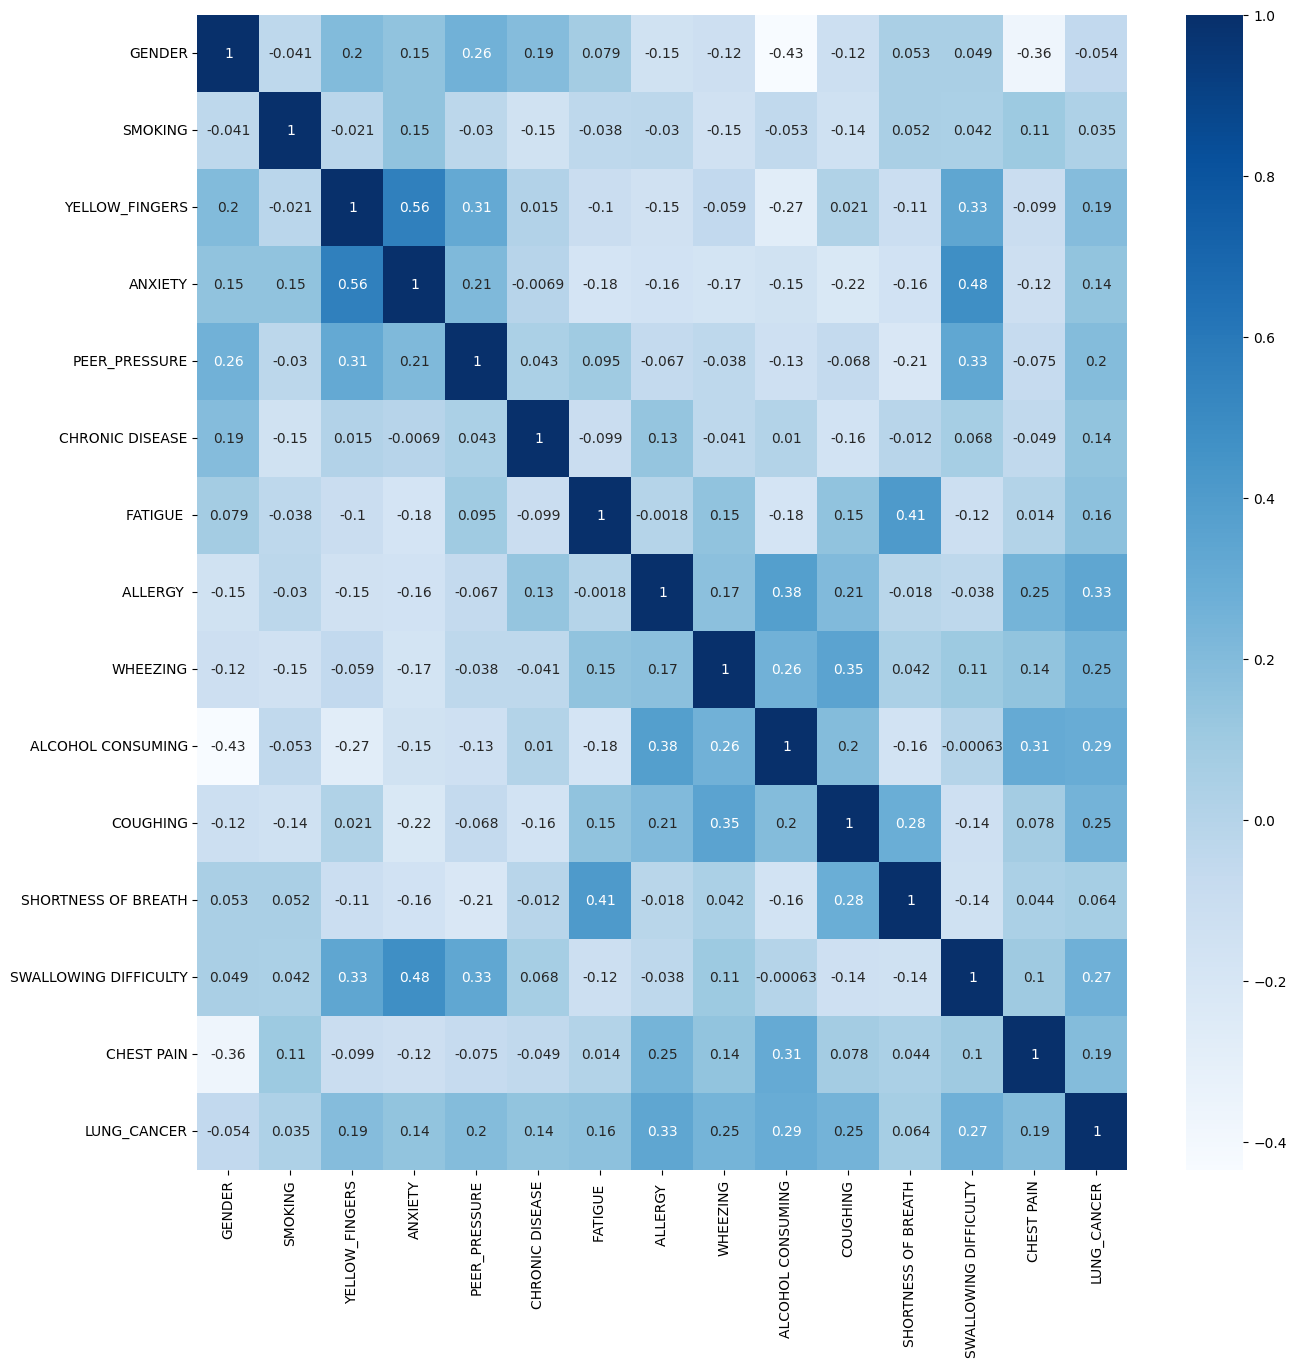

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(lung_cancer.corr(), annot = True, cmap = "Blues")
plt.show()


# Define Target Y and X

In [ ]:
X = lung_cancer.drop(columns = "LUNG_CANCER", axis = 1)
Y = lung_cancer["LUNG_CANCER"]

In [ ]:
X

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,2,2,2,1,1,2,2,1,2,1,2,1
280,1,2,1,1,1,2,2,2,1,1,1,2,1,1
281,0,2,1,1,1,1,2,2,1,1,1,2,1,2
282,0,1,2,2,1,1,1,1,1,1,1,1,2,2


In [ ]:
Y

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0
...,...
279,1
280,0
281,0
282,0


# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3, stratify = Y)
X.shape, X_train.shape, X_test.shape

((276, 14), (220, 14), (56, 14))

# Select a Model to Train

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

# Prediction and Model Evaluation

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.9454545454545454


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.8928571428571429


In [ ]:
test_data_accuracy = round(accuracy_score(X_test_prediction, Y_test)*100,2)

print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  89.29


In [ ]:
print("Mean Absolute Error: ", (mean_absolute_error(Y_test, X_test_prediction)))

Mean Absolute Error:  0.10714285714285714


In [ ]:
print("Mean Squared Error: ", (mean_squared_error(Y_test, X_test_prediction)))

Mean Squared Error:  0.10714285714285714


In [ ]:
print("Median Absolute Error: ", (median_absolute_error(Y_test, X_test_prediction)))


Median Absolute Error:  0.0


In [ ]:
print("F1 Score: ", (f1_score(Y_test, X_test_prediction)))


F1 Score:  0.9387755102040817


# Result

In [ ]:
input_values =(56,2,2,2,1,1,1,1,1,1,1,2,2,1)
#input_values = (61,2,2,2,1,1,2,2,1,2,1,2,2,2)

input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_values_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("This Person has not Lung Cancer.")
else:
    print("This Preson has Lung Cancer.")


[1]
This Preson has Lung Cancer.
